In [55]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [56]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
# Cargar datos
data = np.loadtxt(('/content/gdrive/MyDrive/wheat.csv'), delimiter=',', skiprows=1)
X = data[:, :8]
y = data[:, 7]
m = y.size

In [58]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [59]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]
Media calculada: [14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143  2.        ]
Desviación estandar calculada: [2.90276331 1.30284559 0.02357309 0.44200731 0.37681405 1.49997296
 0.49030891 0.81649658]
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ... -9.86151745e-01
  -3.83577423e-01 -1.22474487e+00]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ... -1.78816620e+00
  -9.22013487e-01 -1.22474487e+00]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ... -6.67479334e-01
  -1.18919199e+00 -1.22474487e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ...  3.07658816e+00
  -7.18060432e-01  1.22474487e+00]
 

In [60]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.14209777  0.21546244 ... -0.98615174 -0.38357742
  -1.22474487]
 [ 1.          0.01118803  0.00822376 ... -1.7881662  -0.92201349
  -1.22474487]
 [ 1.         -0.19206658 -0.36020056 ... -0.66747933 -1.18919199
  -1.22474487]
 ...
 [ 1.         -0.56757084 -0.69024735 ...  3.07658816 -0.71806043
   1.22474487]
 [ 1.         -1.03608992 -1.03564515 ... -0.0681352  -0.7425348
   1.22474487]
 [ 1.         -0.87762023 -0.93586356 ...  1.29122264 -0.70378372
   1.22474487]]


In [61]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [62]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [48]:
# Primero, cargamos el conjunto de datos reales que vamos a utilizar para entrenar el modelo
import pandas as pd   
df = pd.read_csv("wheat.csv")

# Separamos las variables de entrada (X) de la variable de salida (y)
X = df[["area", "perimeter", "compactness", "length", "width", "asymmetry coefficient", "groove length"]]
y = df["category"]

# A continuación, dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal y lo entrenamos con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# A continuación, generamos datos sintéticos utilizando el modelo entrenado
# Para ello, creamos valores sintéticos para las variables de entrada y utilizamos el modelo para predecir los valores de la variable de salida
import numpy as np
X_synth = np.random.rand(10000, 7) # Creamos 10000 filas y 7 columnas de valores aleatorios entre 0 y 1 para las variables de entrada
y_synth = model.predict(X_synth) # Predecimos los valores de la variable de salida utilizando el modelo entrenado

# Creamos un nuevo dataframe con los datos sintéticos generados
df_synth = pd.DataFrame({"var1": X_synth[:,0], "var2": X_synth[:,1], "var3": X_synth[:,2], "var4": X_synth[:,3],"var5": X_synth[:,4],"var6": X_synth[:,5],"var7": X_synth[:,6],"var8": y_synth})

# Finalmente, guardamos el dataframe con los datos sintéticos generados en un archivo CSV
df_synth.to_csv("datos_sinteticos.csv", index=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


theta calculado por el descenso por el gradiente: [ 1.75562734 -0.02243974 -0.03060661 -0.0799477  -0.02835575 -0.04249729
  0.13233398  0.12314669  0.55926636]
El tipo de trigo predecido es de tipo: -23


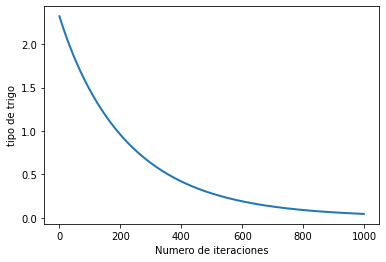

In [79]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0021
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('tipo de trigo')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el Indice de Reflexion de un vidrio segun los materiales que contiene
X_array = [1,12.26,13.6,0.8333,5.408,2.833,4.756,5.36,1]
X_array[0:8] = (X_array[0:8] - mu) / sigma
RI = np.dot(X_array, theta)   

print('El tipo de trigo predecido es de tipo: {:.0f}'.format(RI))

In [80]:
X_array = [1,12.26,13.6,0.8333,5.408,2.833,4.756,5.36,3.0]
X_array[0:8] = (X_array[0:8] - mu) / sigma

In [81]:
X_array[1:8]

[-1.7648182801349002,
 539.980206480468,
 -10.84876487337714,
 5.7041270855822725,
 -0.5781443899114901,
 -1.3299195953979603,
 4.1151427678757395]

In [82]:
# Cargar datos
data = np.loadtxt(('/content/gdrive/MyDrive/wheat.csv'), delimiter=',', skiprows=1)
X = data[:, :8]
y = data[:, 7]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [83]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [87]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,12.26,13.6,0.8333,5.408,2.833,4.756,5.36,2.098]
RI = np.dot(X_array, theta) 

print('El tipo de trigo es: {:.0f}'.format(RI))

Theta calculado a partir de la ecuación de la normal: [ 1.67387881e-10  2.99236330e-12 -8.63073502e-12 -7.56394947e-11
  1.22496457e-12  5.04757347e-12 -3.53710117e-14  6.18394225e-14
  1.00000000e+00]
El tipo de trigo es: 2
